# **ELEVVO PATHWAYS MACHINE LEARNING INTERNSHIP**
---
## **Task 01: Student Score Prediction**
---
## **Submitted By: Muhammad Usman**
---

In [27]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## **Loading Student Performance Factors Dataset**

In [28]:
data = pd.read_csv('/content/StudentPerformanceFactors.csv')
data.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


In [29]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

## **Dataset Cleaning**

In [30]:
#remove all unnecessary columns by keepin only study hours and previous score as per requirement
keep_columns = ['Hours_Studied', 'Previous_Scores', 'Exam_Score']
data = data[keep_columns]

In [31]:
data.head(3)

,Hours_Studied,Previous_Scores,Exam_Score
0,23,73,67
1,19,59,61
2,24,91,74


In [32]:
data.isnull().sum()

,0
Hours_Studied,0
Previous_Scores,0
Exam_Score,0


In [33]:
data.dropna()
data.head(3)

,Hours_Studied,Previous_Scores,Exam_Score
0,23,73,67
1,19,59,61
2,24,91,74


## **Visualization: Scatter plot of Hours_Studied vs Exam_Score**

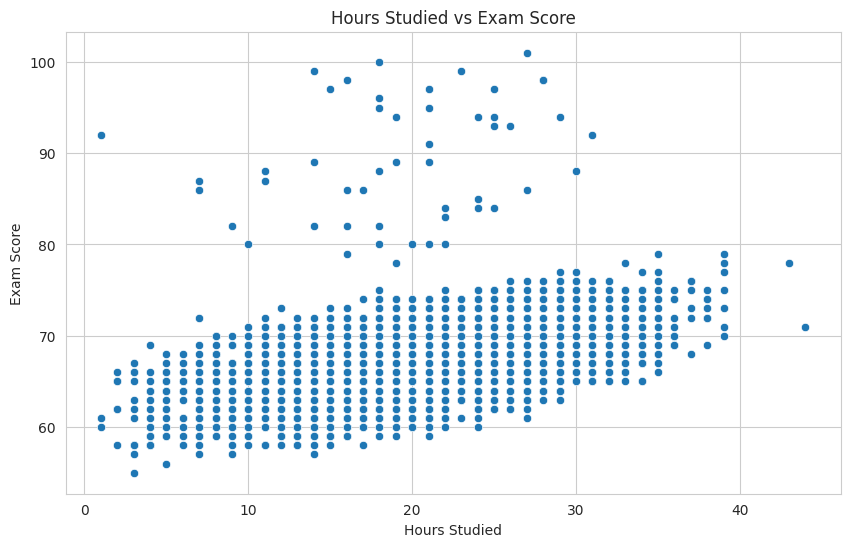

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.savefig('hours_studied_vs_score.png')
plt.show()

## **Visualization: Scatter plot of Previous_Scores vs Exam_Score**

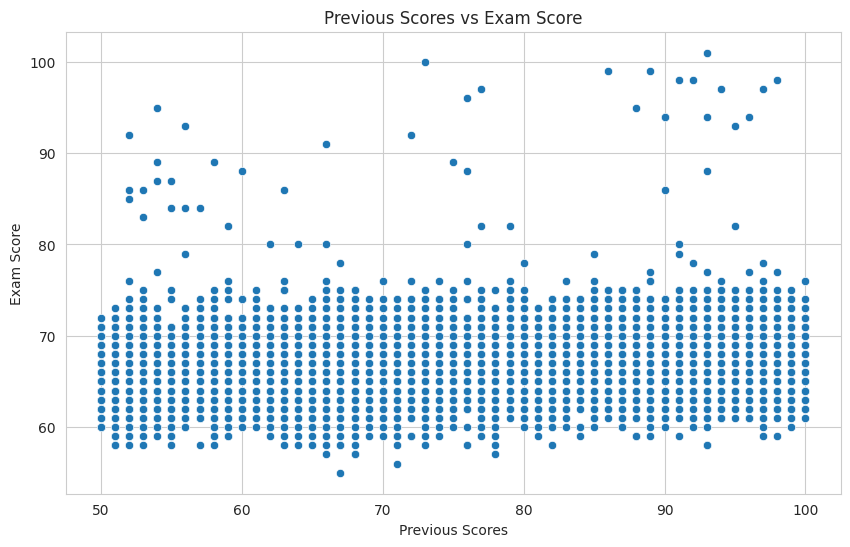

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=data)
plt.title('Previous Scores vs Exam Score')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.savefig('previous_scores_vs_score.png')
plt.show()

## **Data Splitting and Model Training(Linear Regression)**

In [38]:
X = data[['Hours_Studied', 'Previous_Scores']].values
y = data['Exam_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

## **Model(Linear Regression) prediction and Evaluation**

In [40]:
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Results:")
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R² Score: {lr_r2:.2f}")


Linear Regression Results:
Mean Squared Error: 10.54
R² Score: 0.25


## **Visualize Linear Regression Predictions**

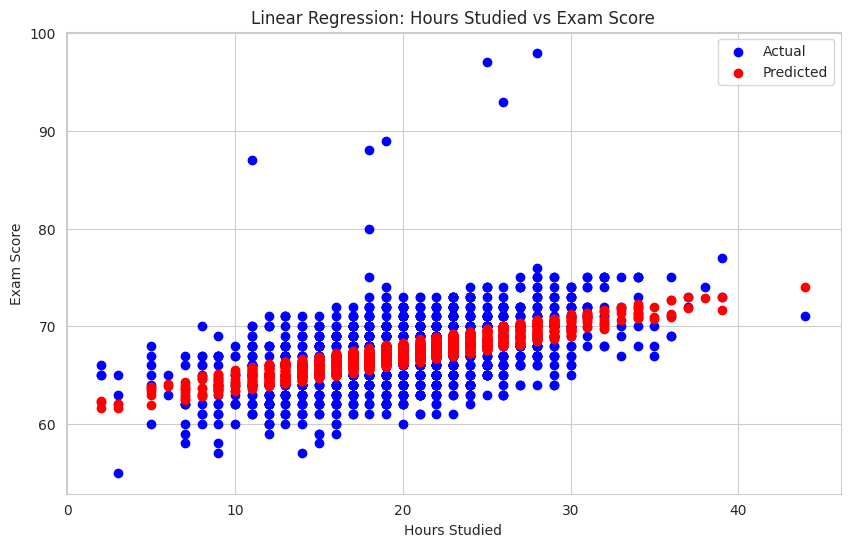

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred_lr, color='red', label='Predicted')
plt.title('Linear Regression: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.savefig('linear_regression_predictions.png')
plt.show()

# **Bonus: Polynomial Regression (Degree 2)**

In [42]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [43]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

## **Model Evaluation**

In [45]:
y_pred_poly = poly_model.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
print("\nPolynomial Regression (Degree 2) Results:")
print(f"Mean Squared Error: {poly_mse:.2f}")
print(f"R² Score: {poly_r2:.2f}")


Polynomial Regression (Degree 2) Results:
Mean Squared Error: 10.53
R² Score: 0.26


## **Visualize Polynomial Regression Predictions**

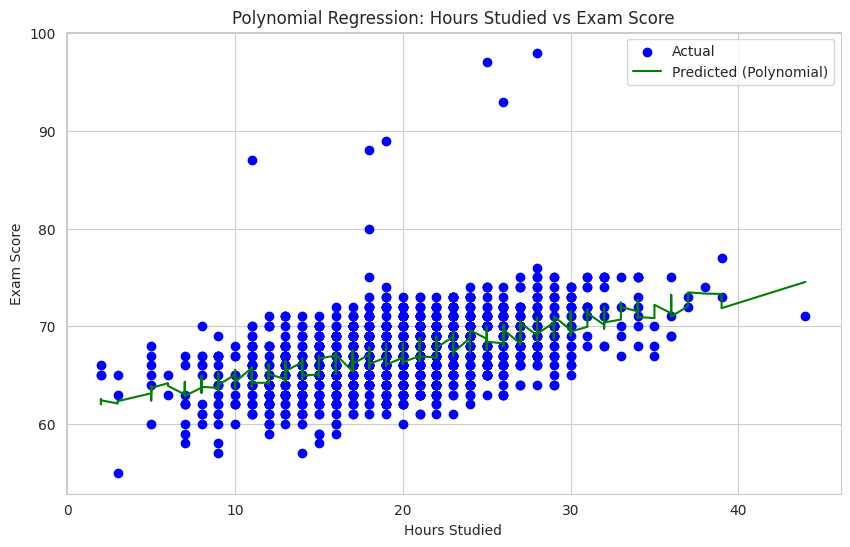

In [46]:
X_sorted = X_test[X_test[:, 0].argsort()]
y_pred_sorted = poly_model.predict(poly.transform(X_sorted))

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.plot(X_sorted[:, 0], y_pred_sorted, color='green', label='Predicted (Polynomial)')
plt.title('Polynomial Regression: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.savefig('polynomial_regression_predictions.png')
plt.show()

## **Comparision of Both Models**

In [47]:
print("\nModel Comparison:")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R²: {lr_r2:.2f}")
print(f"Polynomial Regression - MSE: {poly_mse:.2f}, R²: {poly_r2:.2f}")


Model Comparison:
Linear Regression - MSE: 10.54, R²: 0.25
Polynomial Regression - MSE: 10.53, R²: 0.26
